Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

#for text cleaning
import string
import re
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

#Library for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tweets = pd.read_csv("/content/training_data- disasters related tweets.csv")
tweets.head()

,date,text,user_location
0,2023-02-10 23:17:11+00:00,"@simonkjaer1989 @acmilan @acmilanbr @acmilanar @acmilanyouth Hi Simon, as a Fenerbahçe supporter i did not hear Any… https://t.co/neBQqFulA4",NaN
1,2023-02-10 21:16:06+00:00,Hi People...any help here would be much appreciated....this is just a quick and legit reaction from myself just try… https://t.co/c7OGZzap64,"London, England"
2,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desperate please help jennifer i love you #AhbapDernegi #hatay #AFAD,NaN
3,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #TurkeyQuake #türkiye #deprem https://t.co/8c0ZnBE0ws,NaN
4,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these stories with absolute truth from #TurkeyQuake rather than making baseless d… https://t.co/NWmAwkUw9m,India


In [ ]:
tweets.shape

(29844, 3)

Preprocessing and cleaning

In [ ]:
def preprocess_data(data):
    # Removal of URL
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+', ' ', data)

    # Decontraction (expanding contractions - expanding shortened forms of words)
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(u'http\S+', u'', text)
    text = re.sub(u'(\s)@\w+', u'', text)
    text = re.sub(u'#', u'', text)
    text = re.sub(u'RT', u'', text)

    # Removal of HTML tags
    text = re.sub(r'<.*?>', ' ', text)

    # Removal of emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # dingbats
                               u"\U000024C2-\U0001F251"  # enclosed characters
                               "]+")
    text = emoji_pattern.sub(' ', text)

    # Filtering out miscellaneous text
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r"\([^()]*\)", "", text)

    # Remove mentions
    text = re.sub('@\S+', '', text)

    # Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)

    # Lowercase all the words in text
    text = text.lower()
    text = text.split()

    # Removal of words with length < 2
    text = [i for i in text if len(i) > 2 or i.isnumeric()]
    text = ' '.join(text)
    return text

In [ ]:
tweets = tweets[['date','text', 'user_location']].fillna('')
tweets['clean_tweet'] = tweets['text'].apply(lambda txt: preprocess_data(txt))

In [ ]:
def replace_abbreviations(text):
    abbreviations = {
        "lol": "laughing out loud",
        "omg": "oh my god",
        "btw": "by the way",
        "idk": "I don't know",
        "omw": "on my way",
        "brb": "be right back",
        "imo": "in my opinion",
        "tbh": "to be honest",
        "fyi": "for your information",
        "wtf": "what the heck",
        "gtg": "got to go",
        "afk": "away from keyboard",
        "irl": "in real life",
        "bff": "best friends forever",
        "gr8": "great",
        "np": "no problem",
        "thx": "thanks",
        "yw": "you're welcome",
        # Add more abbreviations and their full forms as needed
    }
    words = text.split()
    replaced_words = [abbreviations[word] if word in abbreviations else word for word in words]
    replaced_text = " ".join(replaced_words)
    return replaced_text

In [ ]:
tweets["clean_tweet"] = tweets["clean_tweet"].apply(replace_abbreviations)

In [ ]:
# Removing stopwords. (a.is,an,the,in)

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]    # lowercasing
    # Remove stopwords from the tokenized words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join the filtered tokens back into a sentence
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [ ]:
tweets["clean_tweet"] = tweets["clean_tweet"].apply(remove_stopwords)

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer                ##used to reduce words to their base or dictionary form
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
  lemmatize_text = [lemmatizer.lemmatize(text) for word in text]
  return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tweets["clean_tweet"] = tweets["clean_tweet"].apply(lemmatize)
tweets.sample(5)

,date,text,user_location,clean_tweet
14670,2023-02-14 11:49:16+00:00,#TurkeyEarthquake turkey hasn’t had paypal for years so be warned.,LONDON,turkeyearthquake turkey paypal years warned
28964,2022-09-13 17:48:17+00:00,@AajKamranKhan انٹر ویو آپ نے لیا اور بلاول ہاؤس میڈیا سیل نے آصغ علی زرداری کاانتقال کروادیا اور بلاول زرداری نے تعزیت بھی جاری کردی۔\n#BilawalBhutto #Demise #FloodsInPakistan @AajKamranKhan @arsched https://t.co/Vr1vmxYrft,,aajkamrankhan bilawalbhutto demise floodsinpakistan
11558,2023-02-12 04:23:21+00:00,"On way home just now, the radio said that the earthquakes in Turkey and Syria, equaled 500 atomic bombs. Keep prayi… https://t.co/BLynhO6kbz","Austin, TX",way home radio said earthquakes turkey syria equaled 500 atomic bombs keep prayi
4075,2023-02-11 11:14:04+00:00,Hearing from Turkish friends locally that the price of flights from here to Turkey has doubled. Not happened in ot… https://t.co/YufLonA86t,,hearing turkish friends locally price flights turkey doubled happened
10205,2023-02-10 07:22:29+00:00,EXPLAINER: How long can trapped people survive in rubble of an #earthquake? | Read\n\n#TurkeySyriaEarthquake… https://t.co/DrI2GjMj8F,New Delhi,explainer long trapped people survive rubble earthquake read turkeysyriaearthquake


Labelling along with sentiment

In [ ]:
from textblob import TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [ ]:
tweets['polarity'] = tweets['clean_tweet'].apply(get_polarity)
tweets['sentiment'] = tweets['polarity'].apply(get_sentiment)
tweets.head()

,date,text,user_location,clean_tweet,polarity,sentiment
0,2023-02-10 23:17:11+00:00,"@simonkjaer1989 @acmilan @acmilanbr @acmilanar @acmilanyouth Hi Simon, as a Fenerbahçe supporter i did not hear Any… https://t.co/neBQqFulA4",,simonkjaer1989 simon fenerbah supporter hear,0.000000,Neutral
1,2023-02-10 21:16:06+00:00,Hi People...any help here would be much appreciated....this is just a quick and legit reaction from myself just try… https://t.co/c7OGZzap64,"London, England",people help would much appreciated quick legit reaction try,0.266667,Positive
2,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desperate please help jennifer i love you #AhbapDernegi #hatay #AFAD,,jlo turkeyquake desperate please help jennifer love ahbapdernegi hatay afad,-0.050000,Negative
3,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #TurkeyQuake #türkiye #deprem https://t.co/8c0ZnBE0ws,,thank rafael means lot turkeyquake rkiye deprem,0.000000,Neutral
4,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these stories with absolute truth from #TurkeyQuake rather than making baseless d… https://t.co/NWmAwkUw9m,India,adgpi hey try cover stories absolute truth turkeyquake rather making baseless,0.200000,Positive


In [ ]:
# View sentiment counts

tweets.sentiment.value_counts()

Neutral     16445
Positive    8532 
Negative    4867 
Name: sentiment, dtype: int64

In [ ]:
data =  tweets[['date','user_location','clean_tweet','sentiment']]
data = data.dropna()
data.head()

,date,user_location,clean_tweet,sentiment
0,2023-02-10 23:17:11+00:00,,simonkjaer1989 simon fenerbah supporter hear,Neutral
1,2023-02-10 21:16:06+00:00,"London, England",people help would much appreciated quick legit reaction try,Positive
2,2023-02-10 20:34:38+00:00,,jlo turkeyquake desperate please help jennifer love ahbapdernegi hatay afad,Negative
3,2023-02-10 19:08:06+00:00,,thank rafael means lot turkeyquake rkiye deprem,Neutral
4,2023-02-10 19:03:17+00:00,India,adgpi hey try cover stories absolute truth turkeyquake rather making baseless,Positive


In [ ]:
column_1 = data['date']
column_2 = data['user_location']
column_3 = data['clean_tweet']

feature extraction using multiple features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 1000
vectorizer = TfidfVectorizer(max_features=max_features)
feature_1 = vectorizer.fit_transform(data['date'])
feature_2 = vectorizer.fit_transform(data['user_location'])
feature_3 = vectorizer.fit_transform(data['clean_tweet'])

# Concatenate the features
features = pd.concat([pd.DataFrame(feature_1.toarray()), pd.DataFrame(feature_2.toarray()),pd.DataFrame(feature_3.toarray())], axis=1)

In [ ]:
# classification report.

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
def c_report(y_true,y_pred):
    accuracy=round(accuracy_score(y_test,y_pred),3)
    precision=round(precision_score(y_test,y_pred,average='weighted'),3)
    recall=round(recall_score(y_test,y_pred,average='weighted'),3)
    print(f'Accuracy of the model: {np.round(accuracy*100,2)}%')
    print('-'*50)
    print("Classifictaion Report")
    print(classification_report(y_true, y_pred))
    acc_scr = accuracy_score(y_true, y_pred)
    return acc_scr

def plot_cm(y_true,y_pred,cmap = "Blues"):
    mtx = confusion_matrix(y_true, y_pred)
    sns.heatmap(mtx, annot = True, fmt='d', linewidth=0.5,
               cmap='YlGnBu')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [ ]:
y=data['sentiment']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=35)

Building model - SVC, Random Forest and Logistic Regression

In [ ]:
# Build SVC model
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',gamma='auto')
# Train the model
svc_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
# Make predictions on the testing set
y_svc_pred = svc_model.predict(X_test)

Accuracy of the model: 87.6%
--------------------------------------------------
Classifictaion Report
              precision    recall  f1-score   support

    Negative       0.89      0.64      0.74       940
     Neutral       0.85      0.99      0.92      3317
    Positive       0.94      0.78      0.85      1712

    accuracy                           0.88      5969
   macro avg       0.89      0.80      0.84      5969
weighted avg       0.88      0.88      0.87      5969



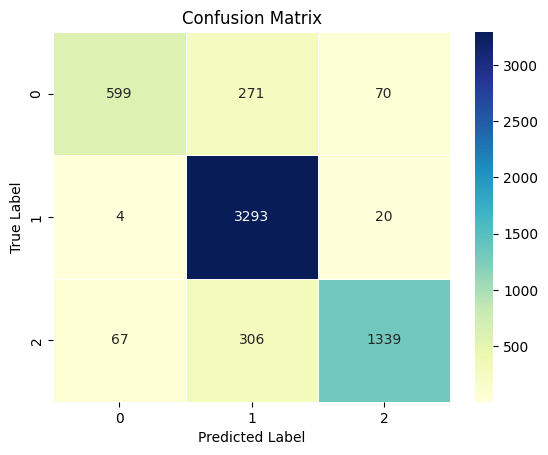

In [ ]:
# Evaluate the model
SVC_c_report = c_report(y_test, y_svc_pred)
plot_cm(y_test, y_svc_pred)

In [ ]:
# Build Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto')
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features='auto')

In [ ]:
# Make predictions on the testing set
y_rf_pred = rf_model.predict(X_test)

Accuracy of the model: 89.2%
--------------------------------------------------
Classifictaion Report
              precision    recall  f1-score   support

    Negative       0.93      0.68      0.79       940
     Neutral       0.86      0.99      0.92      3317
    Positive       0.95      0.81      0.87      1712

    accuracy                           0.89      5969
   macro avg       0.91      0.83      0.86      5969
weighted avg       0.90      0.89      0.89      5969



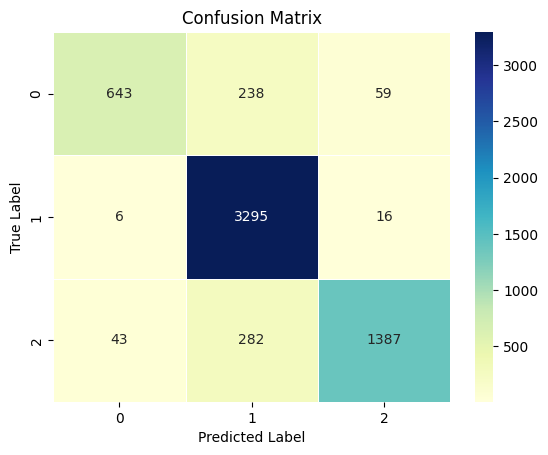

In [ ]:
# Evaluate the model
rf_c_report = c_report(y_test, y_rf_pred)
plot_cm(y_test, y_rf_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier object with specific parameters
lr_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
lr_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Make predictions on the testing set
y_lr_pred = lr_model.predict(X_test)

Accuracy of the model: 86.7%
--------------------------------------------------
Classifictaion Report
              precision    recall  f1-score   support

    Negative       0.91      0.61      0.73       940
     Neutral       0.84      0.99      0.91      3317
    Positive       0.92      0.78      0.84      1712

    accuracy                           0.87      5969
   macro avg       0.89      0.79      0.83      5969
weighted avg       0.87      0.87      0.86      5969



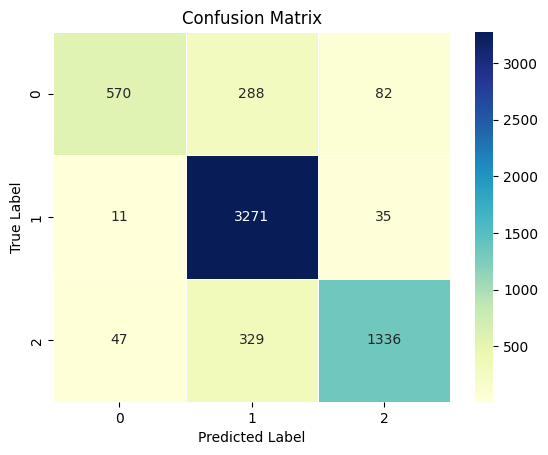

In [ ]:
# Evaluate the model
lr_c_report = c_report(y_test, y_lr_pred)
plot_cm(y_test, y_lr_pred)

Comparison Table

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate


models = ['SVC', 'Random Forest', 'Logistic Regression']  # List of model names
predictions = [y_svc_pred, y_rf_pred, y_lr_pred]  # List of predicted labels
true_labels = [y_test] * len(models)  # List of true labels

# Initialize lists to store evaluation metric values
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate over each model and calculate the evaluation metrics
for i in range(len(models)):
    accuracy = accuracy_score(true_labels[i], predictions[i])
    precision = precision_score(true_labels[i], predictions[i], average='macro')
    recall = recall_score(true_labels[i], predictions[i], average='macro')
    f1 = f1_score(true_labels[i], predictions[i], average='macro')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a DataFrame to store the evaluation metrics for each model
data = []
for i in range(len(models)):
    data.append([models[i], accuracy_scores[i], precision_scores[i], recall_scores[i], f1_scores[i]])

# Define the table headers
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']

# Print the comparison table
table = tabulate(data, headers, tablefmt='github')
print(table)

| Model               |   Accuracy |   Precision |   Recall |   F1-score |
|---------------------|------------|-------------|----------|------------|
| SVC                 |   0.876361 |    0.893984 | 0.804042 |   0.83769  |
| Random Forest       |   0.891607 |    0.91167  | 0.827996 |   0.860397 |
| Logistic Regression |   0.867314 |    0.889476 | 0.790963 |   0.826418 |


Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC


# Create a classifier object (e.g., random forest)
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto')

# Define the number of folds for cross-validation
k = 5

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
for fold_idx, score in enumerate(cv_scores):
    print(f"Fold {fold_idx + 1}: Accuracy = {score}")

# Calculate and print the average and standard deviation of accuracy scores
avg_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print(f"\nAverage Accuracy: {avg_accuracy}")
print(f"Standard Deviation of Accuracy: {std_accuracy}")

Fold 1: Accuracy = 0.878324607329843
Fold 2: Accuracy = 0.8810471204188481
Fold 3: Accuracy = 0.8808376963350786
Fold 4: Accuracy = 0.8835602094240838
Fold 5: Accuracy = 0.8896335078534031

Average Accuracy: 0.8826806282722511
Standard Deviation of Accuracy: 0.003851126119865143


Testing part

In [ ]:
for i in range(len(y_rf_pred)):
    print(f"Label: {y_rf_pred[i]} | Tweets: {tweets['clean_tweet'][i]} | Location: {tweets['user_location'][i]} | Date: {tweets['date'][i]}")

Streaming output truncated to the last 5000 lines.
Label: Negative | Tweets: fifth earthquake magnitude 5 4 jolts eastern turkey says usgs earthquakeinturkey earthquake | Location: Bengaluru, India | Date: 2023-02-07 08:55:42+00:00
Label: Neutral | Tweets: former player christian missing rubble turkeysyria earthquaketurkey search | Location: Spain | Date: 2023-02-07 08:54:31+00:00
Label: Positive | Tweets: prayers turkey syria countries effected earthquake may god protect mercy | Location: Bahrain | Date: 2023-02-07 08:54:31+00:00
Label: Positive | Tweets: heart dropped seeing photo may allah forgive muslims died powerful 7 8 earthquake | Location: pakistan | Date: 2023-02-07 08:54:27+00:00
Label: Negative | Tweets: thank stephen brilliant analysis back amp refine proof big foot | Location: Brittany non-oblast. | Date: 2023-02-07 08:53:43+00:00
Label: Positive | Tweets: pakistan yesterday allowed brief airspace usage indianairforce 17a globemaster iii transport aircraft | Location: On 